# CO2 CAR EMISSIONS PREDICTION - MACHINE LEARNING

### Importing Python Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

### Importing Scikit-Learn requirements

In [2]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

### Reading Dataframe

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Inspecting Dataframe

Inspecting Dataframe for any null values, missing data, duplicated data or data stored in wrong format. We cannot feed the Algorithm bad data.

In [4]:
print("Sum of Null values\n")
print(df.isna().sum())
print("\n")

print("Column Datatypes\n")
print(df.info())
print("\n")

print("Sum of Duplicates:",df.duplicated().sum())

Sum of Null values

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


Column Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANS

There are no duplicates, no missing values and features seem to be in the right data type. The data is ready for the next step.

### Feature Engineering

In [5]:
data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


### Correlation

Finding correlation between features and the target variable(CO2EMISSIONS) is important for feature engineering. The purpose of this is to select the features with the best correlation with the target variable to improve the model's performance

We'll find correlations using Scatter Plots.

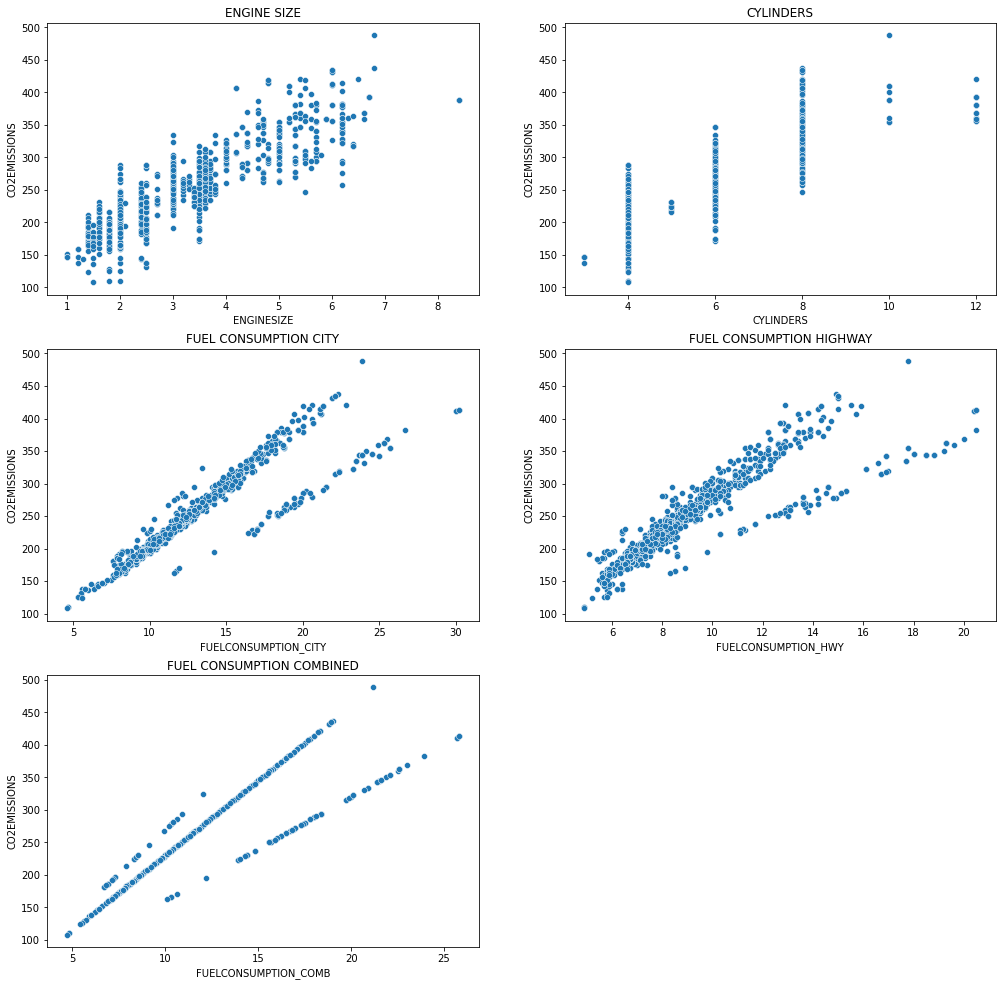

In [6]:
plt.figure(figsize=(17,17))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)

sns.scatterplot(x='ENGINESIZE',y='CO2EMISSIONS',data=data,ax=ax1)
ax1.set_title('ENGINE SIZE')
sns.scatterplot(x='CYLINDERS',y='CO2EMISSIONS',data=data,ax=ax2)
ax2.set_title('CYLINDERS')
sns.scatterplot(x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',data=data,ax=ax3)
ax3.set_title('FUEL CONSUMPTION CITY')
sns.scatterplot(x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS',data=data,ax=ax4)
ax4.set_title('FUEL CONSUMPTION HIGHWAY')
sns.scatterplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=data,ax=ax5)
ax5.set_title('FUEL CONSUMPTION COMBINED');

### Input and Output Data

Selecting `Engine Size`, `Number of Cylinders` and `Fuel Consumption Combined`.

In [7]:
input_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
output_df = df[['CO2EMISSIONS']]

In [8]:
input_data = np.asarray(input_df)
output_data = np.asarray(output_df)

In [9]:
input_data.shape

(1067, 3)

In [10]:
output_data.shape

(1067, 1)

### Splitting Data

Splitting data is an important step as it helps mitigate out of sample accuracy

In [11]:
in_train, in_test, out_train, out_test = train_test_split(input_data, output_data, test_size=0.2,random_state=42)

### Model Training

To check the performance of our models, we'll use mean absolute errors, mean squared errors and variance scores as evaluation metrics.

The lower the errors, the more accurate the model.

A variance score of 1 is perfect prediction.

### Linear Regression 

In [12]:
model = linear_model.LinearRegression()

model.fit(in_train, out_train)
predictions = model.predict(in_test)

abs_error = mean_absolute_error(out_test, predictions)
sq_error = mean_squared_error(out_test, predictions)
Lineareg = explained_variance_score(out_test, predictions)

print("Mean Absolute Error:", abs_error)
print("Mean Squared Error:", sq_error)
print("Variance score:",Lineareg)

Mean Absolute Error: 16.721593983516488
Mean Squared Error: 512.8551370148299
Variance score: 0.8767249005578317


### Random Forest Regression

In [13]:
model2 = RandomForestRegressor()
model2.fit(in_train, out_train.ravel())
predictions2 = model2.predict(in_test)

abs_error_m2 = mean_absolute_error(out_test, predictions2)
sq_error_m2 = mean_squared_error(out_test, predictions2)
RandomForest = explained_variance_score(out_test, predictions2)

print("MAE:", abs_error_m2)
print("MSE:", sq_error_m2)
print("Variance score:",RandomForest)

MAE: 4.3088334260495476
MSE: 153.2874050280878
Variance score: 0.9629290719028378


### Gradient Boosting Regression

In [14]:
model3 = GradientBoostingRegressor()
model3.fit(in_train, out_train.ravel())
predictions3 = model3.predict(in_test)

abs_error_m3 = mean_absolute_error(out_test, predictions3)
sq_error_m3 = mean_squared_error(out_test, predictions3)
Gradient = explained_variance_score(out_test, predictions3)

print("MAE:", abs_error_m3)
print("MSE:", sq_error_m3)
print("Variance score:",Gradient)

MAE: 6.798687820004034
MSE: 171.6847612492945
Variance score: 0.9585160535478912


Since the Random Forest Regressor is the most accurate, having the highest variance score and lowest error, we'll go with that.